In [68]:
#importing the libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import joblib 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
#Getting the data from the dataset 
data = pd.read_csv("car_purchasing.csv", encoding="ISO-8859-1")
data

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [10]:
# Thats a great thing that our data is successfully being read 


## Data Peprocessing 

In [13]:
#checking for the null values 
data.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [19]:
#There are no null value from the data 
#But we need to encode the categorical variables as the machine cant understand the strings or text
data['country'].unique()

array(['Bulgaria', 'Belize', 'Algeria', 'Cook Islands', 'Brazil',
       'Liberia', 'Syria', 'Czech Republic', 'Armenia', 'Somalia',
       'Sint Maarten', 'Greenland', 'Nicaragua', 'Palestine, State of',
       'United Arab Emirates', 'Gabon', 'Tokelau', 'Portugal', 'Chad',
       'Iraq', 'Sudan', 'Angola', 'Nigeria', 'Madagascar', 'Macedonia',
       'Oman', 'Colombia', 'Namibia', 'Denmark', 'Dominican Republic',
       'Costa Rica', 'Botswana', 'Saint Pierre and Miquelon', 'France',
       'Senegal', 'Cambodia', 'Suriname', 'Turkey', 'Ethiopia',
       'French Guiana', 'Bhutan', 'Georgia', 'Mozambique', 'Nauru',
       'Timor-Leste', 'Djibouti', 'Argentina', 'Taiwan', 'Åland Islands',
       'Turks and Caicos Islands', 'Samoa', 'Vanuatu', 'Mongolia',
       'Sri Lanka', 'Guinea-Bissau', 'Egypt', 'Slovenia', 'Benin',
       'Cape Verde', 'Paraguay', 'Laos', 'Iceland', 'Viet Nam',
       'Marshall Islands', 'Germany', 'Kyrgyzstan', 'Mauritius', 'Gambia',
       'Reunion', 'Jordan', 'S

In [23]:
#as we have seen as there are many unique values we cant encode them lets drop them 
data.drop(['customer name','customer e-mail','country'],axis=1,inplace=True)

In [25]:
data

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [27]:
# Getting the basic info and detailed statistics 
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               500 non-null    int64  
 1   age                  500 non-null    float64
 2   annual Salary        500 non-null    float64
 3   credit card debt     500 non-null    float64
 4   net worth            500 non-null    float64
 5   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


### Data Visualization

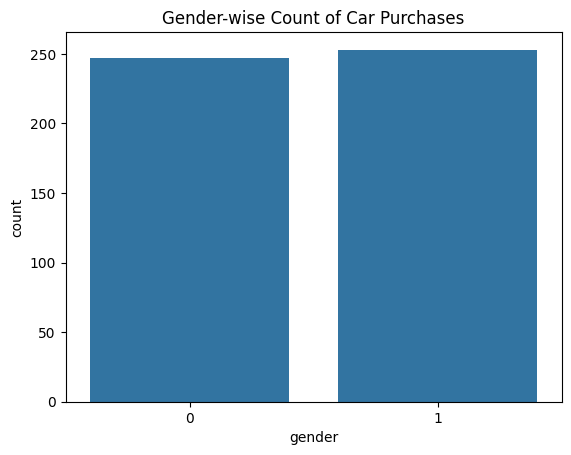

In [34]:
sns.countplot(x='gender', data=data)
plt.title('Gender-wise Count of Car Purchases')
plt.show()


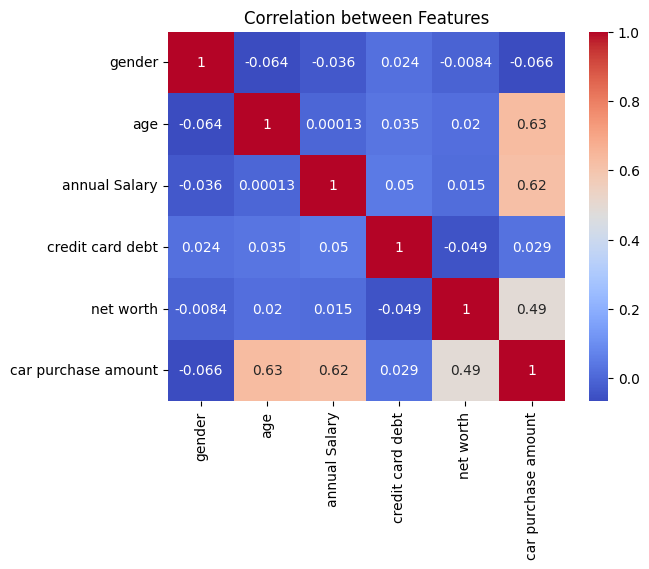

In [36]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Features')
plt.show()


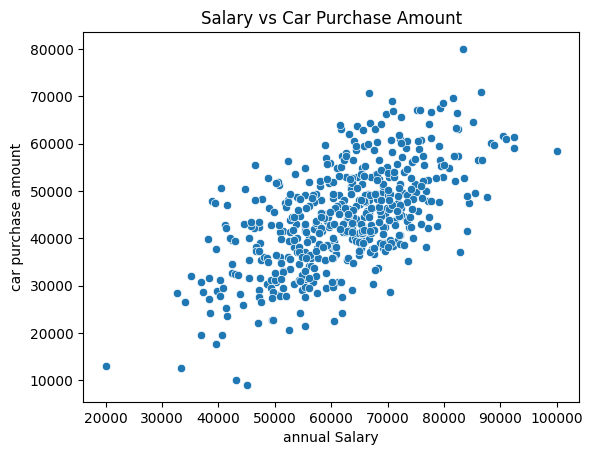

In [40]:
sns.scatterplot(x='annual Salary', y='car purchase amount', data=data)
plt.title('Salary vs Car Purchase Amount')
plt.show()


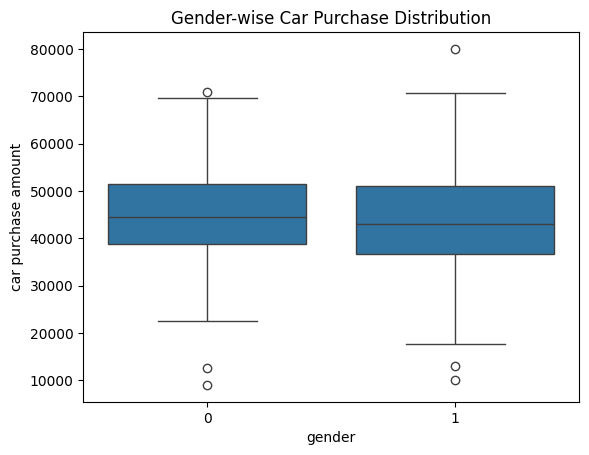

In [42]:
sns.boxplot(x='gender', y='car purchase amount', data=data)
plt.title('Gender-wise Car Purchase Distribution')
plt.show()


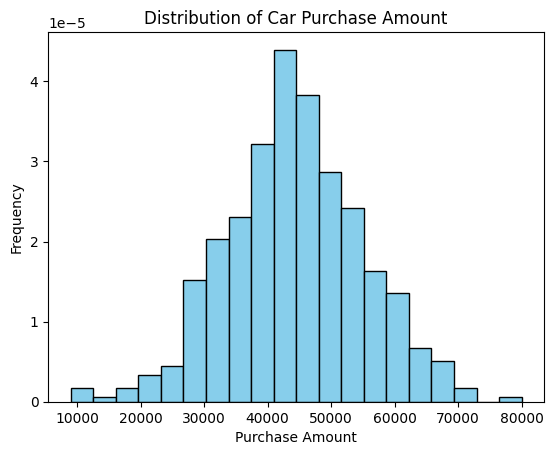

In [46]:
plt.hist(data['car purchase amount'], bins=20,density=True,color='skyblue', edgecolor='black')
plt.title('Distribution of Car Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


In [50]:
#Classifying the inputs and outputs 
X=data.drop('car purchase amount',axis=1)
Y=data['car purchase amount']
print(X,Y)

     gender        age  annual Salary  credit card debt    net worth
0         0  41.851720    62812.09301      11609.380910  238961.2505
1         0  40.870623    66646.89292       9572.957136  530973.9078
2         1  43.152897    53798.55112      11160.355060  638467.1773
3         1  58.271369    79370.03798      14426.164850  548599.0524
4         1  57.313749    59729.15130       5358.712177  560304.0671
..      ...        ...            ...               ...          ...
495       0  41.462515    71942.40291       6995.902524  541670.1016
496       1  37.642000    56039.49793      12301.456790  360419.0988
497       1  53.943497    68888.77805      10611.606860  764531.3203
498       1  59.160509    49811.99062      14013.034510  337826.6382
499       1  46.731152    61370.67766       9391.341628  462946.4924

[500 rows x 5 columns] 0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41

In [52]:
# we will round off the car sales to one decimal
Y=Y.apply(lambda x:round(x,1))

In [54]:
print(Y)

0      35321.5
1      45115.5
2      42925.7
3      67422.4
4      55915.5
        ...   
495    48901.4
496    31491.4
497    64147.3
498    45442.2
499    45107.2
Name: car purchase amount, Length: 500, dtype: float64


In [60]:
# Splitting the dataset into training and testing 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [62]:
#Defining the model
model=LinearRegression(fit_intercept=True)
model.fit(X_train,Y_train)

LinearRegression()

In [64]:
# Predicting the test set results
Y_pred = model.predict(X_test)

# Calculating evaluation metrics
mae_score = mean_absolute_error(Y_test, Y_pred)   # Mean Absolute Error
mse_score = mean_squared_error(Y_test, Y_pred)     # Mean Squared Error
score = r2_score(Y_test, Y_pred)                   # R2 Score

# Printing the results
print(f"Mean Absolute Error: {mae_score}")
print(f"Mean Squared Error: {mse_score}")
print(f"R2 Score: {score}")


Mean Absolute Error: 1.1605411723108046
Mean Squared Error: 2.1149669242496465
R2 Score: 0.9999999804120997


In [66]:
# These results suggest that your model is performing extremely well, which is excellent for regression tasks.

In [70]:
#deploying the model
joblib.dump(model,'sales.pkl')

['sales.pkl']